# Trials

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix , classification_report, f1_score,\
                            accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

SEED = 0

In [2]:
df = pd.read_csv("divorce.csv")

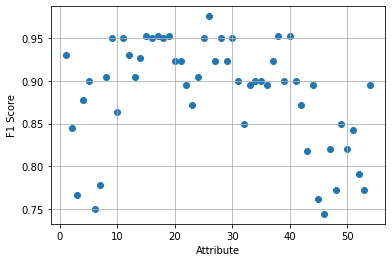

In [3]:
sizes = np.linspace(1, 54, 54, dtype = np.int)
scores = []

for column in df.columns[:-1]:
    X=df[column]
    y=df['Class']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = SEED)

    X_train = np.array(X_train).reshape(-1,1)
    X_test = np.array(X_test).reshape(-1,1)

    scaler = StandardScaler()
    scaler.fit(X_train)
    StandardScaler(copy=True, with_mean=True, with_std=True)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    logreg = LogisticRegression()

    param_grid = {'penalty': ['l2'],
                  'C': [0.01]}

    logreg = GridSearchCV(logreg,
                          param_grid, 
                          cv=5,
                          scoring='f1_macro',
                          n_jobs=-1)

    logreg.fit(X_train_scaled, y_train)

    y_pred = logreg.predict(X_test_scaled)
    
    scores.append(f1_score(y_test, y_pred))
    
    
_ = plt.figure()
plt.scatter(sizes,scores)
plt.xlabel('Attribute')
plt.ylabel('F1 Score')
plt.grid()
plt.show()

In [13]:
X=df['Atr26']
y=df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = SEED)

if len(X_train.shape) < 2:
    X_train = np.array(X_train).reshape(-1,1)
    X_test = np.array(X_test).reshape(-1,1)

scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()

param_grid = {'penalty': ['l2'],
              'C': [0.01]}

logreg = GridSearchCV(logreg,
                      param_grid, 
                      cv=5,
                      scoring='f1_macro',
                      n_jobs=-1)

logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

score = f1_score(y_test, y_pred)
     
print('Score: %f' % (score))

Score: 0.975610


In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.95      0.98        21

    accuracy                           0.98        43
   macro avg       0.98      0.98      0.98        43
weighted avg       0.98      0.98      0.98        43



Text(33.0, 0.5, 'Predicted')

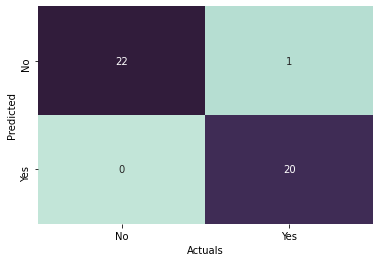

In [15]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat.T, annot=True, fmt='d', cbar=False, cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True),
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('Actuals')
plt.ylabel('Predicted')

In [7]:
# from feature selection
X=df[['Atr11','Atr18','Atr40','Atr20','Atr17','Atr9','Atr19']]
y=df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = SEED)

scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()

param_grid = {'penalty': ['l2'],
              'C': [0.01]}

logreg = GridSearchCV(logreg,
                      param_grid, 
                      cv=5,
                      scoring='f1_macro',
                      n_jobs=-1)

logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

score = f1_score(y_test, y_pred)
     
print('Score: %f' % (score))

Score: 0.950000


In [8]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.90      0.95        21

    accuracy                           0.95        43
   macro avg       0.96      0.95      0.95        43
weighted avg       0.96      0.95      0.95        43



Text(33.0, 0.5, 'Predicted')

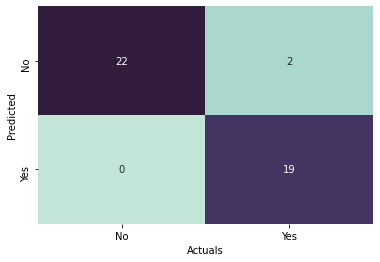

In [9]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat.T, annot=True, fmt='d', cbar=False, cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True),
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('Actuals')
plt.ylabel('Predicted')

In [10]:
# from scatterplot above
X=df[['Atr15','Atr17','Atr19','Atr26','Atr38','Atr40']]
y=df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = SEED)

if len(X_train.shape) < 2:
    X_train = np.array(X_train).reshape(-1,1)
    X_test = np.array(X_test).reshape(-1,1)

scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()

param_grid = {'penalty': ['l2'],
              'C': [0.01]}

logreg = GridSearchCV(logreg,
                      param_grid, 
                      cv=5,
                      scoring='f1_macro',
                      n_jobs=-1)

logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

score = f1_score(y_test, y_pred)
     
print('Score: %f' % (score))

Score: 0.950000


In [11]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.90      0.95        21

    accuracy                           0.95        43
   macro avg       0.96      0.95      0.95        43
weighted avg       0.96      0.95      0.95        43



Text(33.0, 0.5, 'Predicted')

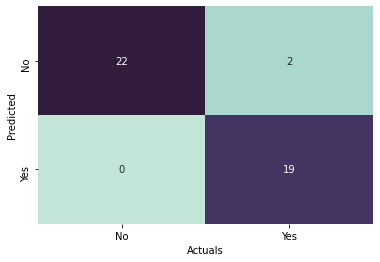

In [12]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat.T, annot=True, fmt='d', cbar=False, cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True),
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('Actuals')
plt.ylabel('Predicted')